# 2. Schrodinger equation <a id="second-chapter"></a>

## <font color = "navy" >2.3 Examples </font> <a id="2.3"></a>

### <font color = "navy" >2.3.2 Particle in a 3D “box” </font>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#Constants (all MKS, except energy which is in eV)
hbar=1.055e-34
m=9.110e-31
epsil=8.854e-12
q=1.602e-19
a0=4*np.pi*epsil*hbar*hbar/(m*q*q)
E0=q/(8*np.pi*epsil*a0)

#Lattice
Np=100
a=(5e-10*2/Np)
R=a*np.array(list(range(1,Np+1)))

t0=(hbar**2)/(2*m*(a**2))/q

#Quantum numbers
n=1
l=0

In [2]:
#Hamiltonian,H = Kinetic,K + Potential,U
K=(2*t0*np.diag(np.ones((Np)))-(t0*np.diag(np.ones((Np-1)),1))-(t0*np.diag(np.ones((Np-1)),-1)))
U=((-q/(4*np.pi*epsil)/R)+(l*(l+1)*hbar*hbar/(2*m*q))/(R*R))
U=np.diag(U)
[D,V]=np.linalg.eigh(K+U)
DD=np.sort(D)

ind=np.array(list(range(0,100)))

#analytical solutions
P1s=(4*a/(a0**3))*R*R*np.exp(-2*R/a0)
P2s=(4*a/(2*4*4*(a0**3)))*R*R*((2-(R/a0))**2)*np.exp(-2*R/(2*a0))
P3s=(4*a/(3*81*81*(a0**3)))*R*R*((27-(18*R/a0)+(2*(R/a0)**2))**2)*np.exp(-2*R/(3*a0))
P2p=(4*a/(3*32*(a0**3)))*R*R*((R/a0)**2)*np.exp(-2*R/(2*a0))
P3p=(8*a/(3*81*81*(a0**3)))*R*R*((6-(R/a0))**2)*((R/a0)**2)*np.exp(-2*R/(3*a0))

In [3]:
#for numerical
#for 1s
n=1
l=0
E=D[ind[n-l-1]]
psi=V[:,ind[n-l-1]]
P1=psi*np.conj(psi)

#for 2s
n=2
l=0
E=D[ind[n-l-1]]
psi=V[:,ind[n-l-1]]
P2=psi*np.conj(psi)

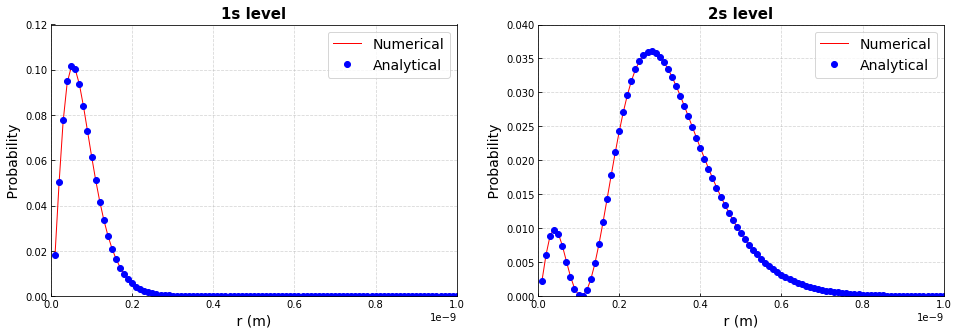

In [4]:
fig=plt.figure(figsize=(16,5))

ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)

#for figure 2.3.7(a)
ax1.set_title('1s level',fontsize=15,fontweight='bold')
ax1.plot(R,P1,'r',lw=1,label='Numerical') #numerical for '1s'
ax1.plot(R,P1s,'bo',lw=1,label='Analytical') #P1s for '1s'
ax1.set_xlabel(' r (m) ',fontsize=14)
ax1.set_ylabel(' Probability ',fontsize=14)
ax1.set_xlim(0,1e-9)
ax1.set_ylim(0,0.12)
ax1.tick_params(axis='both',which='major',direction='in')
ax1.grid(alpha=0.5, ls='--')
ax1.legend(loc=1,fontsize=14)

#for figure 2.3.7(b)
ax2.set_title('2s level',fontsize=15,fontweight='bold')
ax2.plot(R,P2,'r',lw=1,label='Numerical') #numerical for '2s'
ax2.plot(R,P2s,'bo',lw=1,label='Analytical') #P2s for '2s'
ax2.set_xlabel(' r (m) ',fontsize=14)
ax2.set_ylabel(' Probability ',fontsize=14)
ax2.set_xlim(0,1e-9)
ax2.set_ylim(0,0.04)
ax2.tick_params(axis='both',which='major',direction='in')
ax2.grid(alpha=0.5, ls='--')
ax2.legend(loc=1,fontsize=14)